# AI 사례실습과 함께하는 '드래곤볼'을 찾아서, 모델최적화!
* 드래곤볼 7개를 모으면 3가지 선물이 주어진다고 합니다.
* AI 모델링 A부터 Z까지의 각 과정에 드래곤볼이 숨겨져있다고 하는데요.
* 우리는 이제 여섯 번째 마을 '모델최적화' 마을에 도착했습니다.
* 그럼, 지금부터 여섯 번째 드래곤볼을 찾아볼까요?

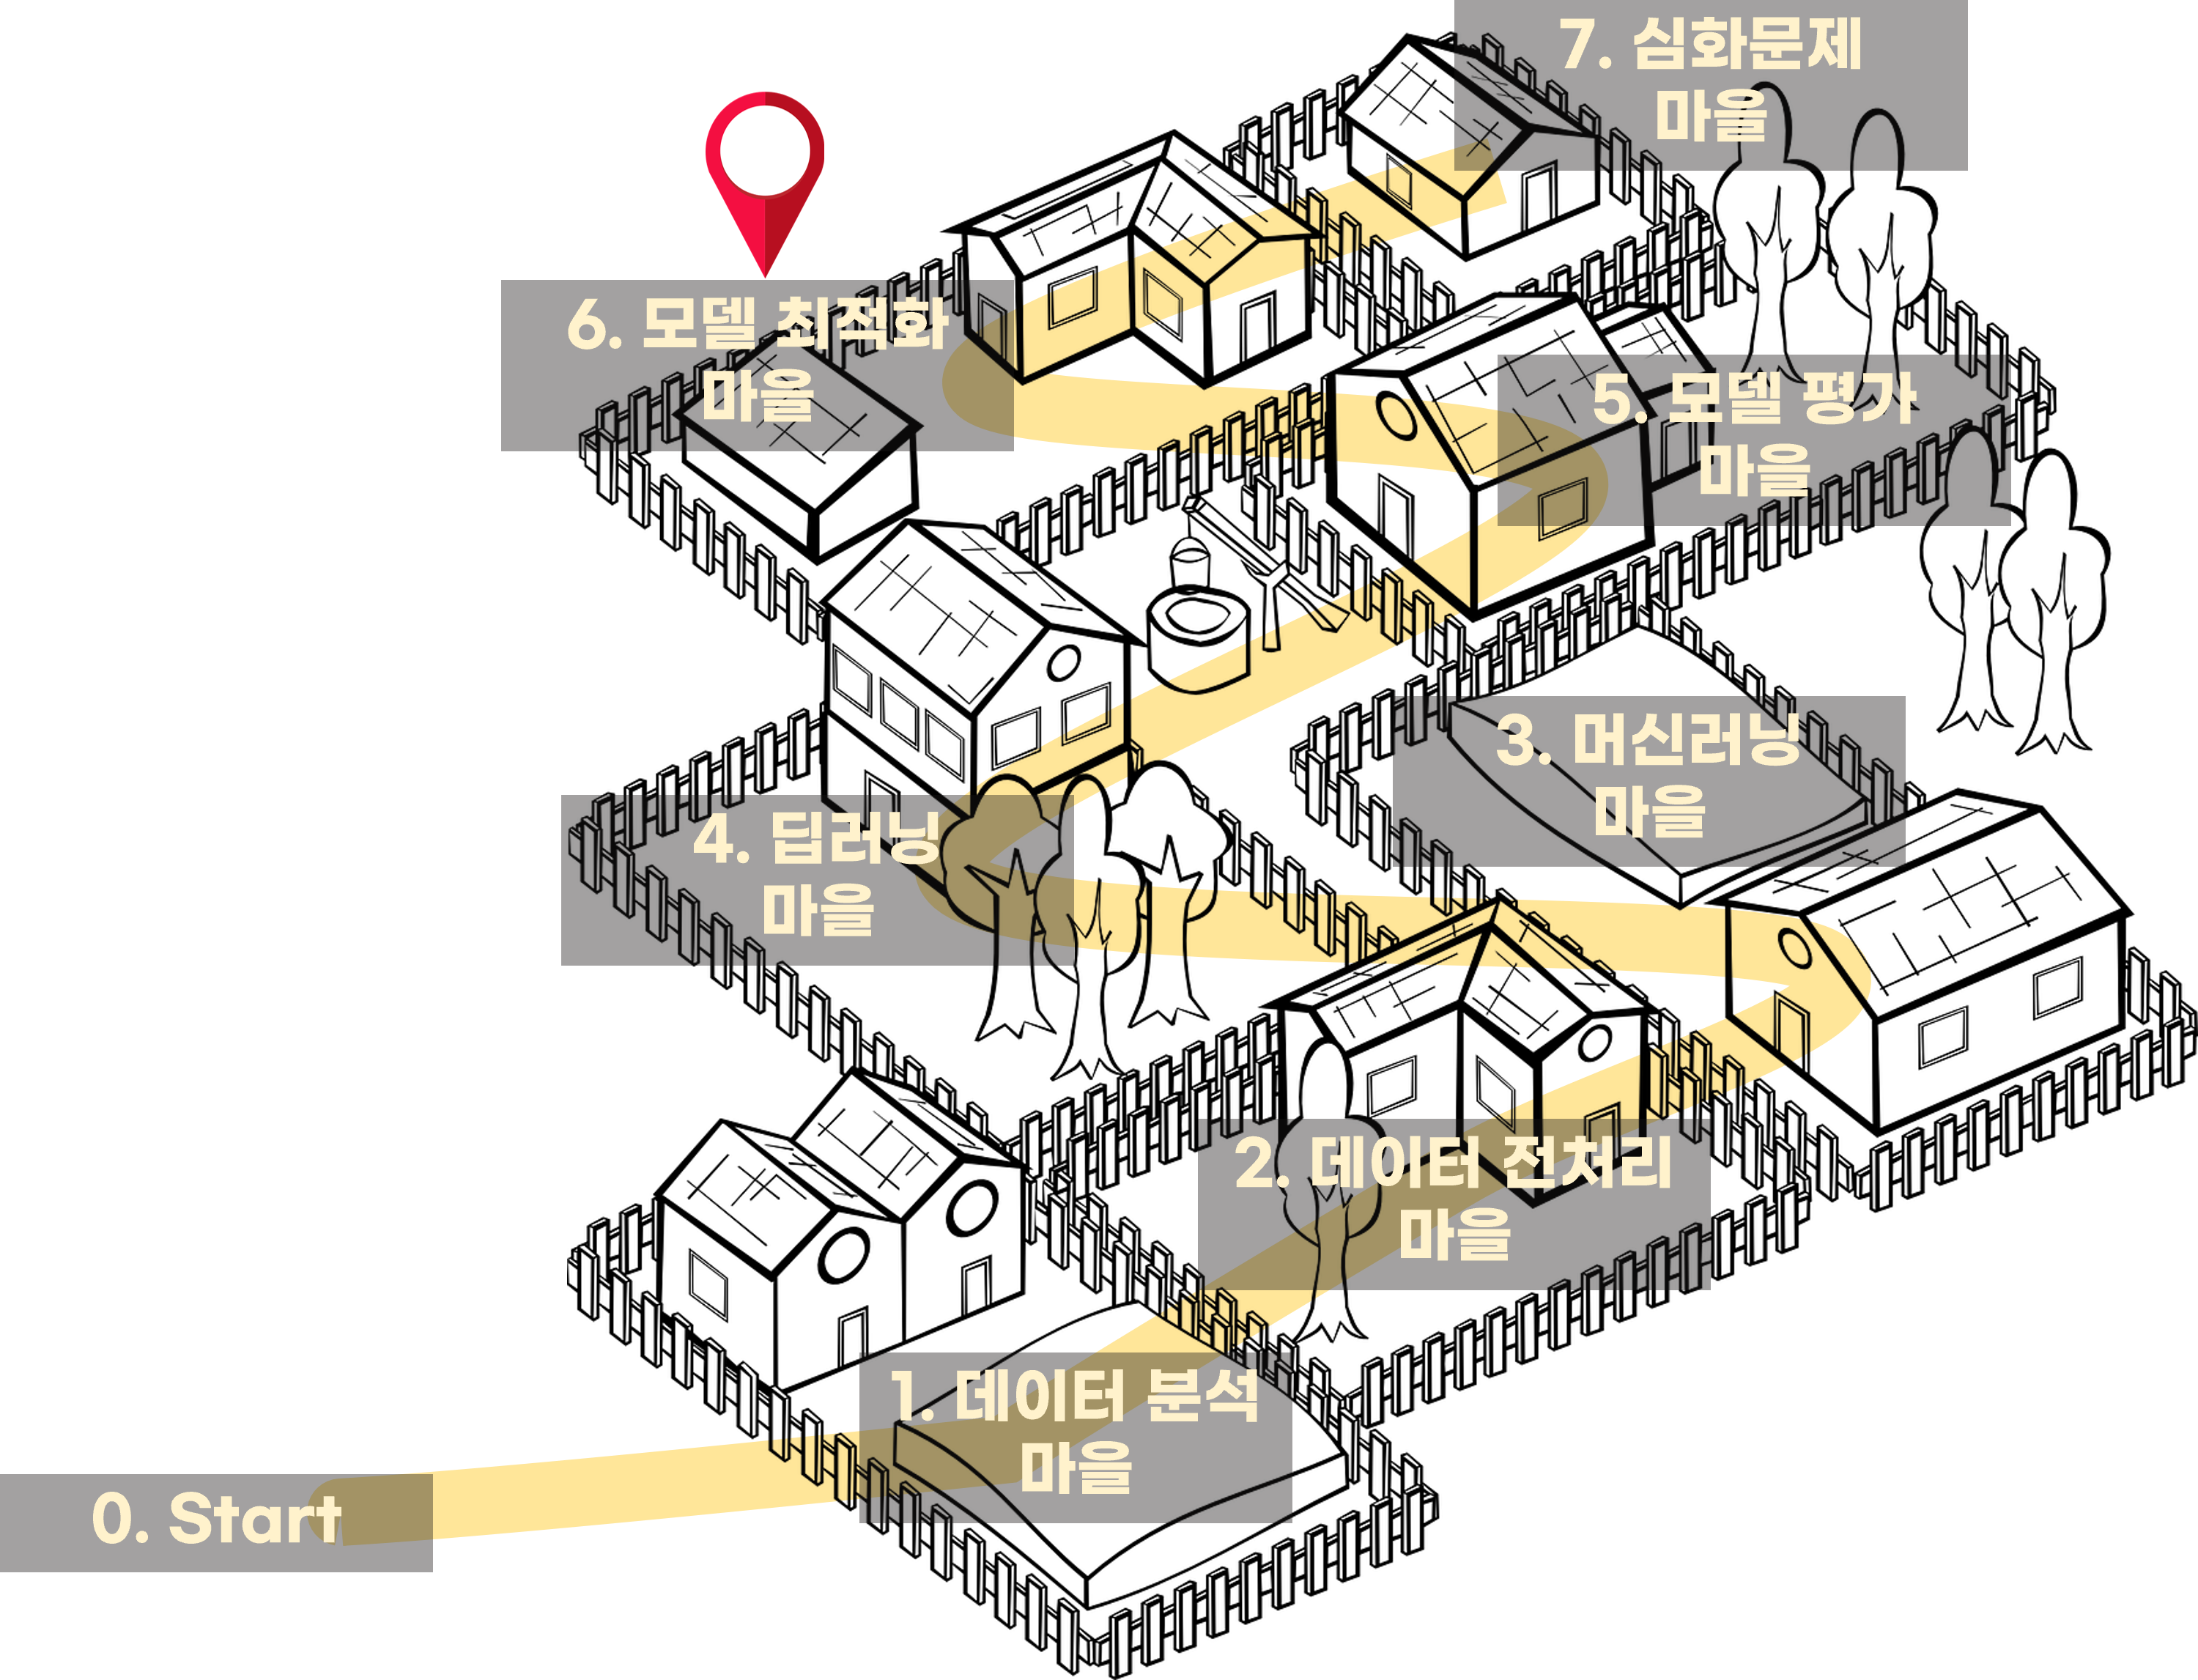

### [상황] 여섯 번째 드래곤볼을 찾아 보겠습니다. 
* 실습문제를 해결할 때마다 단서가 주어지는데요. 
* 이 단서를 기억해두었다가 마지막에 드래곤볼을 찾을 때 활용하시면 되요.

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas requests seaborn xgboost gspread oauth2client

In [ ]:
# ID를 입력해주세요.
ID = "finalTest"

---

# (실습준비) 데이터 불러오기부터

In [ ]:
import pandas as pd

# 학습/평가 데이터 로딩
df_feature = pd.read_csv("add_data/onenavi_train_feature.csv",sep="|")
df_target = pd.read_csv("add_data/onenavi_train_target.csv",sep="|")

# 학습/평가 데이터 로딩
df_evaluation_target = pd.read_csv("add_data/onenavi_evaluation_et.csv",sep="|")
df_evaluation_feature = pd.read_csv("add_data/onenavi_evaluation_feature.csv",sep="|")

In [ ]:
### Train/Test Data Split
from sklearn.model_selection import train_test_split

# train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_feature, df_target, test_size=0.20, random_state=42)

# 1. 모델 최적화 : Hyperparameter Tuning
* Hyperparmeter는 머신러닝에서 모델을 학습하기 전에 설정해주는 옵션 값이라고 할 수 있습니다.
* 설정을 머신러닝이 스스로 찾을 수 있다면 참 좋을텐데
* 불가능하기 때문에 우리가 직접 찾아서 설정 해주어야 합니다.
* 모델을 최적화하는 전략은 크게 Panda전략과 Caviar전략으로 나누어볼 수 있는데요.

# 지금부터 모델 최적화를 시작합니다.

# 1. Panda전략 : Babysitting one model
* 크게 하나의 모델을 정하고 성능을 평가하면서 점진적으로 모델을 '돌보기'하는 전략
* 한 번에 한마리씩 아기를 가지는 팬더는 아기 팬더가 살아남을 수 있도록 지극정성으로 케어를 하는데, 여기서도 동일하게 하나의 모델을 잘 케어해서 최적화하는 개념을 이야기한다.
<img src=attachment:bear-gb997a40ee_1920.png width="300" height="300" />
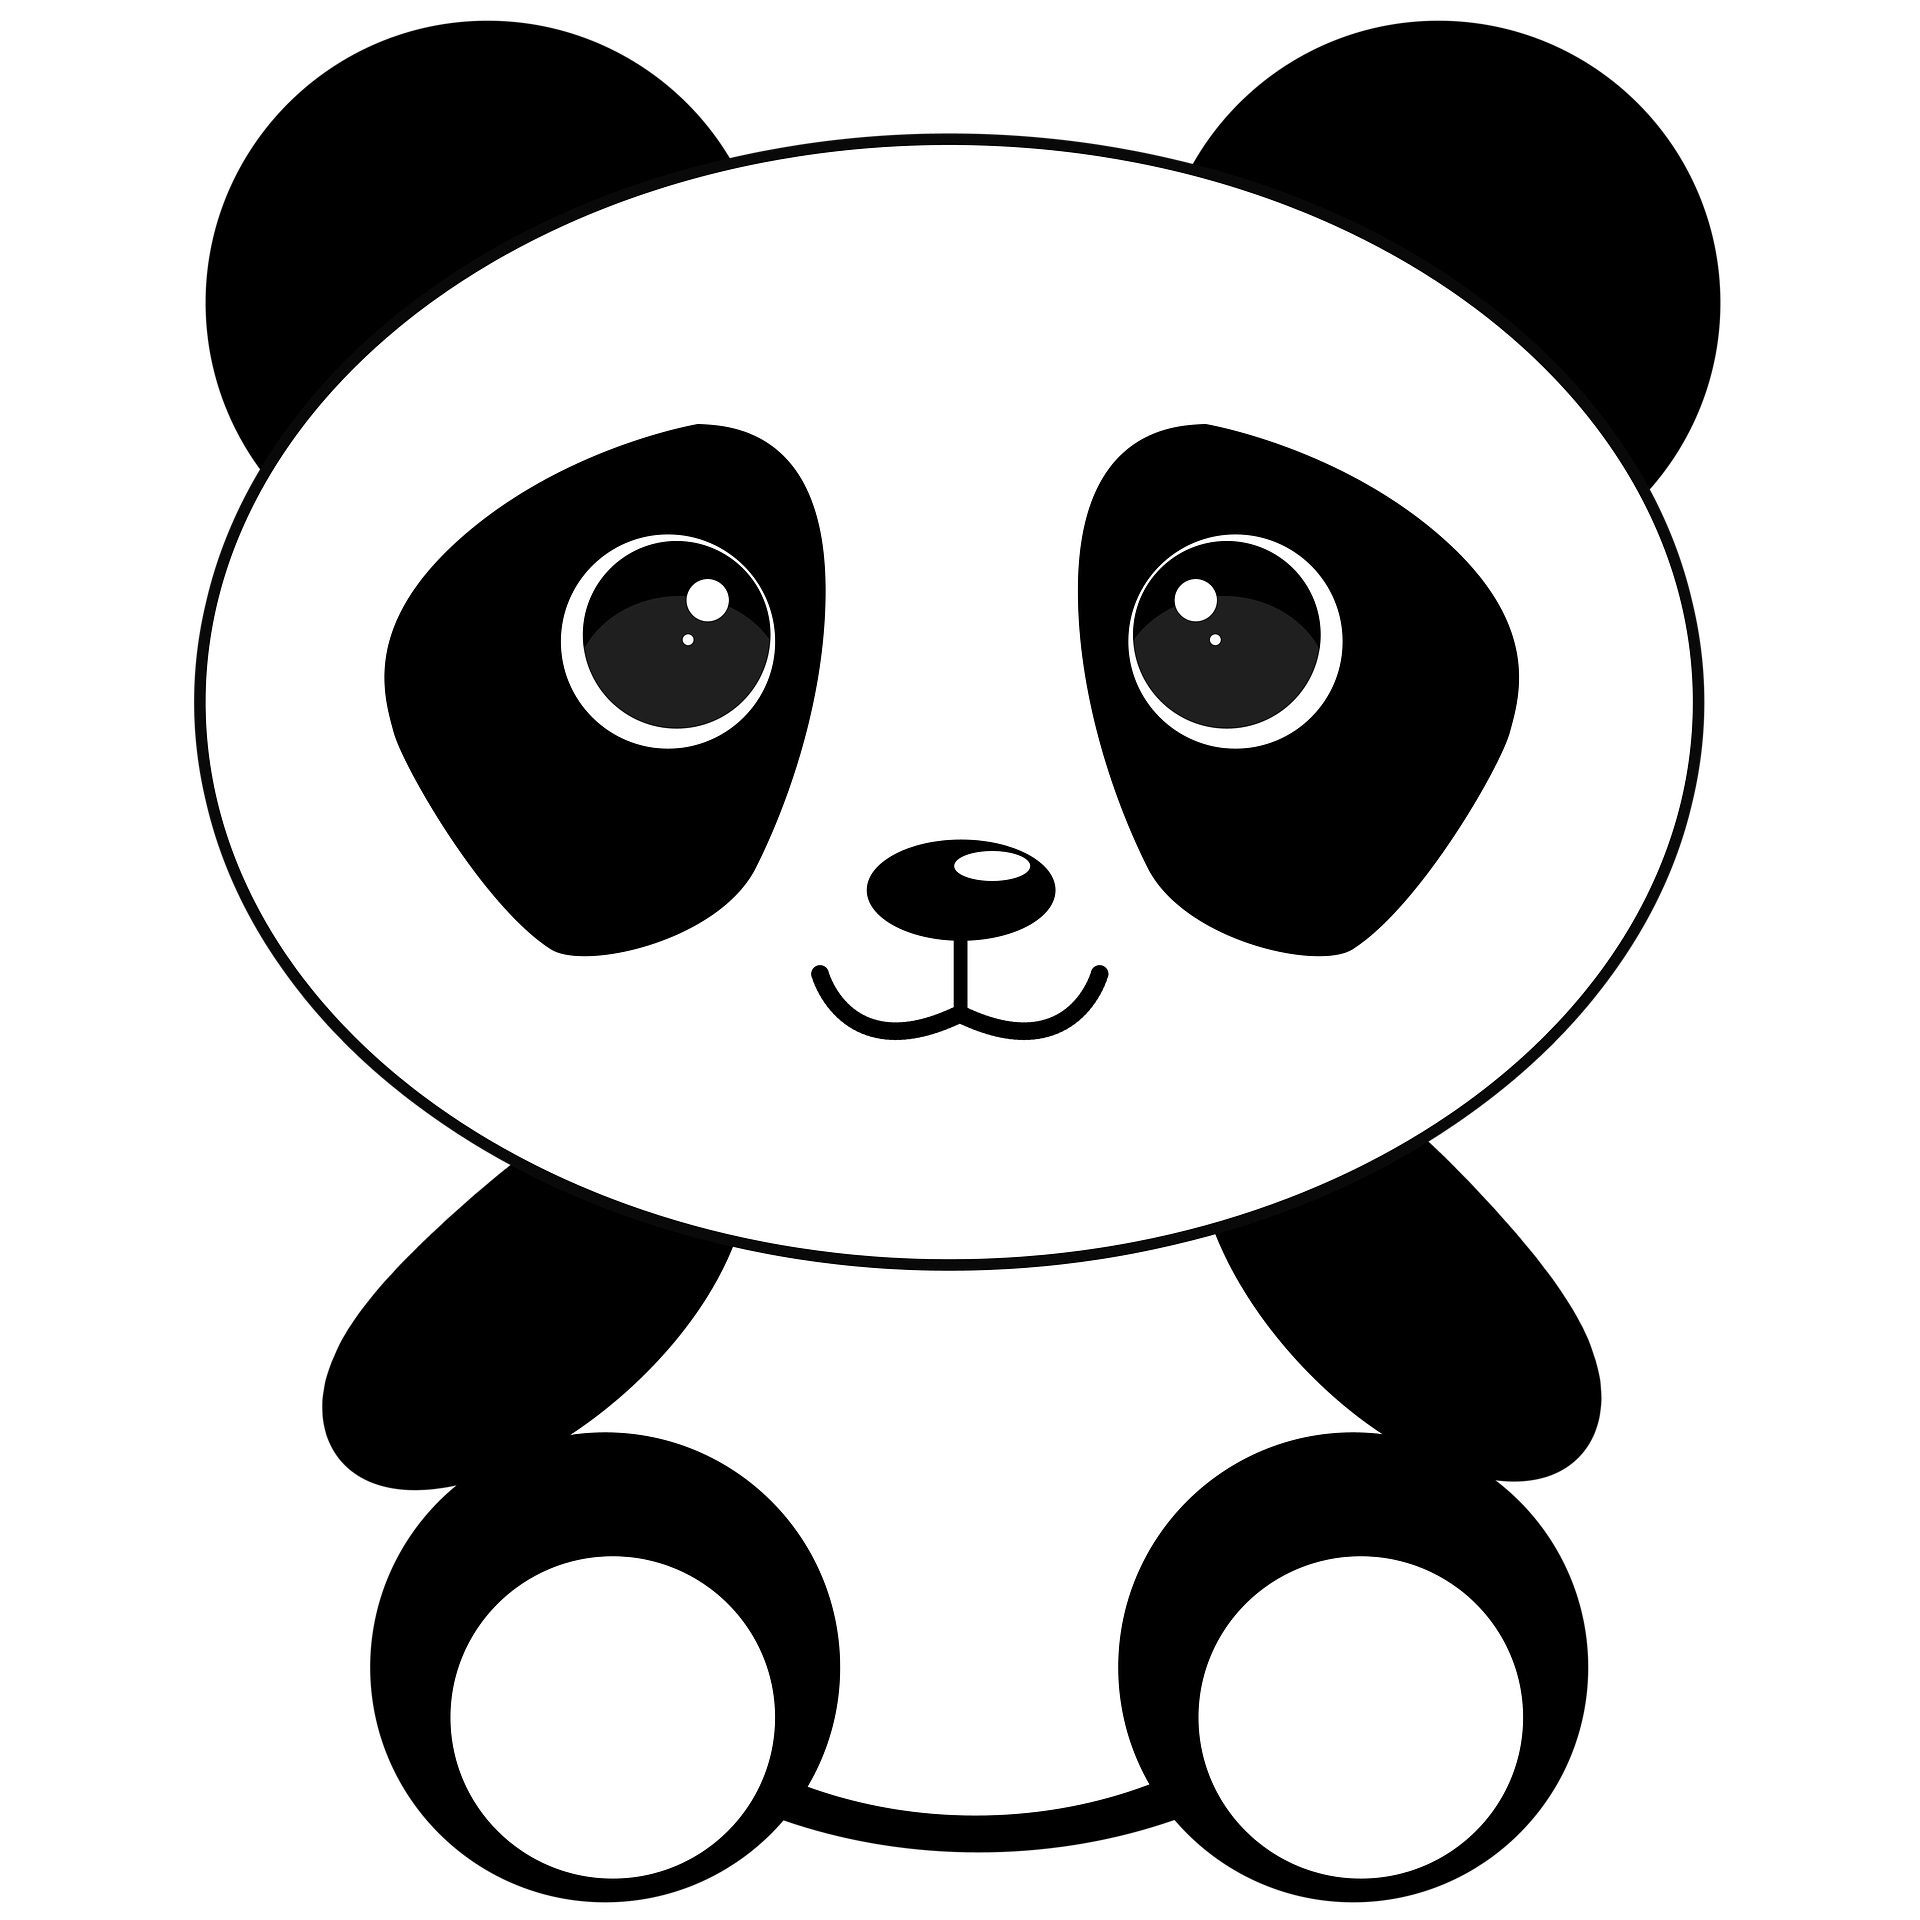

[Panda 전략 Tip : XGBoost 기준]
* 모델 성능을 높이고 싶다면!
1. n-estimators는 높게, eta는 낮게

* 튜닝 예시
1. n-estimators와 learning_rate를 먼저 지정(n-estimators를 100으로 고정하고 최적 learning_rate 찾기)
2. 나머지 hyperparameter 튜닝
3. n-estimators와 learning_rate 조정(둘은 반비례, 꼭 법칙은 아님!)
    * (예시) n-estimators를 2배 늘리면 learning_rate는 1/2로, n-estimators를 10배 늘리면 learning_rate는 1/10

#### [실습문제1] 모델 최적화_1
* XGBoost를 기준으로 Panda전략에 따라 모델최적화를 하고 모델을 저장해주세요.
* random_state는 42로 학습시켜주세요.
* Test set의 R-squared Score는 0.718이 넘을 때까지 최적화를 해주세요.
* 최적화된 모델은 4_model.pkl로 저장해주세요.(폴더위치는 model입니다.)
* 단서 :Test set의 R-squared Score가 0.718이 넘었다면 Pass

In [ ]:
# 아래에 실습코드를 작성하세요.

from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

model=xgb(n_estimators=100, eta=0.1, random_state=42)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# 1단계 n-estimators와 learning_rate(eta)를 먼저 지정 : eta 0.2 => R-squared Score on Test set : 0.71680
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

model=xgb(n_estimators=100, eta=0.2, random_state=42)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# 1단계 n-estimators와 learning_rate(eta)를 먼저 지정 : eta 0.3 => R-squared Score on Test set : 0.70988
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

model=xgb(n_estimators=100, eta=0.3, random_state=42)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# 2단계 나머지 hyperparameter 튜닝 : 0.71724
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

model=xgb(n_estimators=100, eta=0.2, 
          max_depth=5, subsample= 0.8, colsample_bytree=0.5, reg_alpha=3, gamma=5, random_state=42)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# 3단계 n-estimators와 learning_rate 조정 : 0.71890
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

model=xgb(n_estimators=200, eta=0.1,
          max_depth=5, subsample= 0.8, colsample_bytree=0.5, reg_alpha=3, gamma=5, random_state=42)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# 모델을 저장합니다.
import joblib

joblib.dump(model, 'model/4_model.pkl') 

In [ ]:
# 단서1은 따로 적지 않으셔도 됩니다. '4_model.pkl'로 저장만 하시면 자동으로 체크합니다.

# 2. Caviar전략 : Training many models in parallel
* 여러개 모델을 동시에 돌려서 가장 좋은 모델을 선택하는 전략
* 한 철에 1억개의 알을 품는 물고기가 있다고 한다. 물고기가 번식하는 과정은 하나에 많은 집중을 쏟기보다 하나 또는 그 이상이 더 잘 살아남기를 그지 지켜보는데, 여기에서 착안하여 여러 모델을 시도해서 최적의 모델을 찾는 전략을 Caviar전략이라고 한다.
<img src=attachment:sushi-gf579e6a46_1280.png width="300" height="300" />
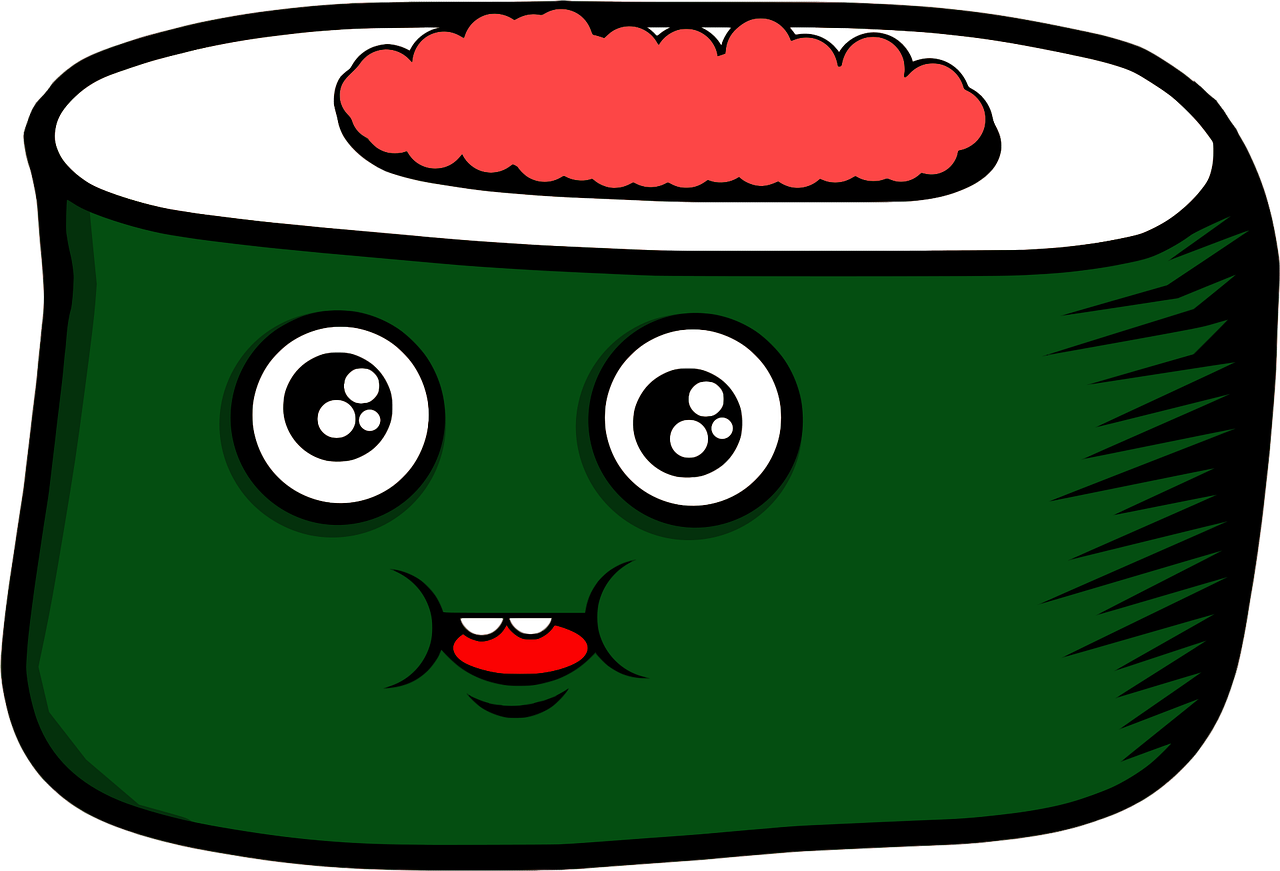

#### Caviar 전략에서는 Tip이라고 정리하기보다 Gridsearch라는 유용한 라이브러리를 소개하고자 한다.
* Gridsearch는 여러 모델을 코드 몇 줄로 시도하고 최적 파라미터를 도출하기에 편하다.
* 다만, 시간이 많이 걸린다.

#### [실습문제2] 모델 최적화_2
* Gridsearch를 활용해서 Caviar전략에 따라 모델최적화를 하고 모델을 저장해주세요.
* random_state는 42로 학습시켜주세요.
* Test set의 R-squared Score는 0.716을 넘을 수 있는 파라미터를 찾아주세요.
* 최적 파라미터로 모델을 학습시켜주시고 최적화된 모델은 5_model.pkl로 저장해주세요.
* 단서 : Caviar 전략에 도움을 주는 라이브러리 이름은?(Hint : G로 시작하는 단어)

In [ ]:
# 아래에 실습코드를 작성하세요.
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import time

params = { 'n_estimators' : [50, 100, 200],
          'learning_rate' : [0.01, 0.1, 0.2],
          'max_depth' : [3, 5],
          'subsample' : [0.5, 0.8], 
          'colsample_bytree' : [0.5, 0.8],
          'reg_alpha' : [1, 3],
          'gamma' : [3, 5],
         }

xgb_model = xgb(random_state=42, n_jobs = 1)
grid_cv = GridSearchCV(xgb_model, param_grid = params, cv = 3, n_jobs = 1)
start_time = time.process_time()
grid_cv.fit(train_x, train_y)
end_time = time.process_time()

print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

best_model = grid_cv.best_estimator_
pred_y = best_model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# 모델을 저장합니다.
import joblib

joblib.dump(best_model, 'model/5_model.pkl') 

In [ ]:
# 아래에 단서를 적어주세요.
단서2 = "GridSearchCV"# 단서2를 적어주세요.(문자형으로 적어주세요.)

# 2. 모델 평가

#### [실습문제3] 모델 예측 결과 비교하기
* 최적화를 통해 저장된 모델과 앞서 실습한 모델을 상호 비교해보세요.
* 기준은 ETAA를 계산하고 그 평균으로 비교를 합니다. 이를 위해서 함수 'calculation_etaa'를 정의하고 활용해주세요.
* 그리고 각 모델이 예측한 ETAA의 표준편차도 구해주세요.
* 각 모델의 평균과 표준편차를 정리해주세요.
* 단서 : 최적화한 모델(Panda, Caviar) 중 하나는 평가데이터에 적용했을 때, ETAA 평균 82.5보다 개선되어야 합니다.

In [ ]:
#'calculation_etaa'함수 정의
def calculation_etaa(et, eta):
    etaa = (1-(abs(et-eta)/et))*100.0
    etaa[(etaa < 0)] = 0
    return etaa

In [ ]:
# 아래에 실습코드를 작성하세요.

import joblib

# 모델을 담을 빈 리스트 생성
model_result = []

# 앞서 저장한 머신러닝 모델 불러오기 및 저장
for i in range(6):
    model_result.append(joblib.load("model/{}_model.pkl".format(i)))
    
e1_list = ['ETA1', 'ETA2', 'ETA3', 'ETA4', 'ETA5', 'ETA6']
e2_list = ['ETAA1', 'ETAA2', 'ETAA3', 'ETAA4', 'ETAA5', 'ETAA6']

for e1, e2, model in zip(e1_list, e2_list, model_result):
    df_evaluation_target[e1] = model.predict(df_evaluation_feature)
    etaa_value = calculation_etaa(df_evaluation_target['ET'], df_evaluation_target[e1])
    df_evaluation_target[e2] = etaa_value

# mean, min, max, std
etaa = ['ETAA', 'ETAA1', 'ETAA2', 'ETAA3', 'ETAA4', 'ETAA5', 'ETAA6']
alg = ['DATA', 'ML-LG', 'ML-RFR', 'ML-GBR', 'XBR', 'Panda', 'Caviar']

print('+-------------------------------------------------------+')
print('|   ALG    | Mean(%) |    STD    |  MIN(%)  |  MAX(%)   |')
print('+----------+---------+-----------+----------+-----------+')
for i, e in zip(range(len(alg)), etaa):
    eMean = df_evaluation_target[e].mean()
    eStd = df_evaluation_target[e].std()
    eMin = df_evaluation_target[e].min()
    eMax = df_evaluation_target[e].max()
    print('|  {:6s}  |   {:3.1f}  |   {:05.1f}   |   {:4.1f}   |  {:7.1f}  | '.format(alg[i], eMean, eStd, eMin, eMax))
print('+----------+---------+-----------+----------+-----------+\n\n')


In [ ]:
# 각 모델의 ETAA 평균과 표준편차를 정리하세요.
# Panda : 
# Caviar :

In [ ]:
# 단서3는 따로 적지 않으셔도 됩니다. 조건에 부합하면 자동으로 체크합니다.

* 모델의 R-squared Score, RMSE가 좋았다고해서 실제 평가데이터에 적용했을 때, 비례해서 모델의 정확도 혹은 결과가 좋아지지 않는다는 사실을 알 수 있습니다. 
* 물론 두 수치가 좋아지면 모델의 정확도 혹은 결과가 좋아지는 경향은 있으나, 
* 정확하게 비례하지는 않습니다. 
* 그래서 다각도로 보면서 모델을 만들어줘야합니다.
* (과적합을 방지하고, 변수의 영향을 조정하는 등)

---

### [드래곤볼을 찾아라] 주어진 단서를 모아서 드래곤볼을 찾아보겠습니다.
* 소스코드 실행 후 드래곤볼 이미지 창이 열리고 "드래곤볼을 찾았습니다."라는 문구가 출력된다면 여러분은 드래곤볼을 찾은 거랍니다.

In [ ]:
# 단서를 모두 모았다면 드래곤볼을 찾아봅시다! 아래 소스코드를 실행해 주세요.
import module

module.sixthModule(ID, 단서2)

In [ ]:
# 확인
from IPython.display import Image
Image("./dragonball/6성구.png", width=300, height=300)